## Assignment 7

#### load and display the first 20 rows of the CSV file

In [1]:
import pandas as pd
file = "C:\\Users\\ruchitha\\Downloads\\podcastdata_dataset.csv"
df = pd.read_csv(file)
df.head(20)

id                guest  \
0    1          Max Tegmark   
1    2        Christof Koch   
2    3        Steven Pinker   
3    4        Yoshua Bengio   
4    5      Vladimir Vapnik   
5    6     Guido van Rossum   
6    7          Jeff Atwood   
7    8         Eric Schmidt   
8    9       Stuart Russell   
9   10        Pieter Abbeel   
10  11  Juergen Schmidhuber   
11  12      Tuomas Sandholm   
12  13        Tomaso Poggio   
13  14            Kyle Vogt   
14  14          Lex Fridman   
15  15     Leslie Kaelbling   
16  16       Eric Weinstein   
17  17        Greg Brockman   
18  18            Elon Musk   
19  19       Ian Goodfellow   

                                                title  \
0                                            Life 3.0   
1                                       Consciousness   
2                             AI in the Age of Reason   
3                                       Deep Learning   
4                                Statistical Learning   
5                                              Python   
6                    Stack Overflow and Coding Horror   
7                                              Google   
8                              Long-Term Future of AI   
9                         Deep Reinforcement Learning   
10           Godel Machines, Meta-Learning, and LSTMs   
11                              Poker and Game Theory   
12                        Brains, Minds, and Machines   
13                                  Cruise Automation   
14                 Ask Me Anything – AMA January 2021   
15     Reinforcement Learning, Planning, and Robotics   
16  Revolutionary Ideas in Science, Math, and Society   
17                                     OpenAI and AGI   
18                                    Tesla Autopilot   
19             Generative Adversarial Networks (GANs)   

                                                 text  
0   As part of MIT course 6S099, Artificial Genera...  
1   As part of MIT course 6S099 on artificial gene...  
2   You've studied the human mind, cognition, lang...  
3   What difference between biological neural netw...  
4   The following is a conversation with Vladimir ...  
5   The following is a conversation with Guido van...  
6   The following is a conversation with Jeff Atwo...  
7   The following is a conversation with Eric Schm...  
8   The following is a conversation with Stuart Ru...  
9   The following is a conversation with Peter Abb...  
10  The following is a conversation with Jürgen Sc...  
11  The following is a conversation with Thomas Sa...  
12  The following is a conversation with Tommaso P...  
13  The following is a conversation with Kyle Vogt...  
14  The following is a conversation with Kyle Vogt...  
15  The following is a conversation with Leslie Ka...  
16  The following is a conversation with Eric Wein...  
17  The following is a conversation with Greg Broc...  
18  The following is a conversation with Elon Musk...  
19  The following is a conversation with Ian Goodf...

#### Print the first 400 characters of the "text" column for the specified rows

In [2]:
print(repr(df.iloc[266]["text"][0:400]))
print(repr(df.iloc[300]["text"][0:400]))

"The following is a conversation with Lee Cronin, a chemist from University of Glasgow, who's one of the most fascinating, brilliant, out of the box thinking scientists I've ever spoken to. This episode was recorded more than two weeks ago, so the war in Ukraine is not mentioned. I have been spending a lot of time each day talking to people in Ukraine and Russia. I have family, friends, colleagues,"
"The following is a conversation with Brian Armstrong, cofounder and CEO of Coinbase, the largest cryptocurrency exchange platform with 98 million users in 100 countries, listing Bitcoin, Ethereum, Cardano, and over 100 popular cryptocurrencies. I recorded this conversation with Brian before this week's SEC probe into whether some of the crypto listings are securities and thus need to be regulated "


#### splits the text into paragraphs based on periods followed by newlines and to calculate the number of paragraphs for each row

In [3]:
import re
df["paragraphs"] = df["text"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

#### install the spacy library

In [4]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


#### importing required libraries

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

#### prints the shape of the TF-IDF matrix, which represents the number of documents (rows) and the number of features (columns) after vectorization

In [6]:
stop_words_list = list(stopwords)
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
print(tfidf_text_vectors.shape)


C:\Users\ruchitha\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(319, 16617)


#### creating a new DataFrame named paragraph_df which will store each paragraph along with its corresponding guest from the original DataFrame df

In [7]:
# flatten the paragraphs keeping the guests
paragraph_df = pd.DataFrame([{ "text": paragraph, "guest": guest } 
                               for paragraphs, guest in zip(df["paragraphs"], df["guest"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

text             guest
0  As part of MIT course 6S099, Artificial Genera...       Max Tegmark
1  As part of MIT course 6S099 on artificial gene...     Christof Koch
2  You've studied the human mind, cognition, lang...     Steven Pinker
3  What difference between biological neural netw...     Yoshua Bengio
4  The following is a conversation with Vladimir ...   Vladimir Vapnik
5  The following is a conversation with Guido van...  Guido van Rossum
6  The following is a conversation with Jeff Atwo...       Jeff Atwood
7  The following is a conversation with Eric Schm...      Eric Schmidt
8  The following is a conversation with Stuart Ru...    Stuart Russell
9  The following is a conversation with Peter Abb...     Pieter Abbeel

In [8]:
stop_words_list = list(stopwords)# Convert spaCy stop words to a list
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)# Initialize the TfidfVectorizer with spaCy stop words, min_df, and max_df
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])# Fit and transform the text data in paragraph_df
print(tfidf_para_vectors.shape)


C:\Users\ruchitha\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(319, 16617)


#### uses Non-Negative Matrix Factorization (NMF) to decompose the TF-IDF matrix of text data into two matrices

In [9]:
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_


#### function display_topics is designed to display the top words for each topic identified by the NMF model

In [10]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))
 
# Display topics
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  universe (0.92)
  quantum (0.87)
  physics (0.76)
  consciousness (0.54)
  mechanics (0.40)

Topic 01
  uh (6.29)
  um (4.97)
  enemies (0.21)
  war (0.21)
  papers (0.19)

Topic 02
  war (0.37)
  government (0.20)
  russia (0.19)
  putin (0.18)
  ukraine (0.18)

Topic 03
  neural (0.66)
  consciousness (0.41)
  networks (0.38)
  models (0.28)
  network (0.28)

Topic 04
  bitcoin (1.94)
  ethereum (0.60)
  gold (0.58)
  currency (0.46)
  crypto (0.41)

Topic 05
  virus (0.85)
  vaccine (0.62)
  cells (0.56)
  protein (0.47)
  viruses (0.47)

Topic 06
  robot (0.75)
  robots (0.66)
  driving (0.59)
  autonomous (0.54)
  car (0.47)

Topic 07
  wrestling (1.16)
  fight (0.68)
  judo (0.66)
  jiu (0.61)
  jitsu (0.61)

Topic 08
  python (0.79)
  programming (0.76)
  code (0.52)
  swift (0.43)
  languages (0.38)

Topic 09
  chess (2.08)
  games (1.07)
  poker (0.81)
  player (0.62)
  players (0.59)


#### initializes another NMF model, nmf_para_model

In [11]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_

# Assuming you've defined and imported the display_topics function
# Replace "nmf_para_model" and "tfidf_para_vectorizer" with your actual model and vectorizer objects
feature_names = tfidf_para_vectorizer.get_feature_names_out()
display_topics(nmf_para_model, feature_names)


Topic 00
  universe (0.92)
  quantum (0.87)
  physics (0.76)
  consciousness (0.54)
  mechanics (0.40)

Topic 01
  uh (6.29)
  um (4.97)
  enemies (0.21)
  war (0.21)
  papers (0.19)

Topic 02
  war (0.37)
  government (0.20)
  russia (0.19)
  putin (0.18)
  ukraine (0.18)

Topic 03
  neural (0.66)
  consciousness (0.41)
  networks (0.38)
  models (0.28)
  network (0.28)

Topic 04
  bitcoin (1.94)
  ethereum (0.60)
  gold (0.58)
  currency (0.46)
  crypto (0.41)

Topic 05
  virus (0.85)
  vaccine (0.62)
  cells (0.56)
  protein (0.47)
  viruses (0.47)

Topic 06
  robot (0.75)
  robots (0.66)
  driving (0.59)
  autonomous (0.54)
  car (0.47)

Topic 07
  wrestling (1.16)
  fight (0.68)
  judo (0.66)
  jiu (0.61)
  jitsu (0.61)

Topic 08
  python (0.79)
  programming (0.76)
  code (0.52)
  swift (0.43)
  languages (0.38)

Topic 09
  chess (2.08)
  games (1.07)
  poker (0.81)
  player (0.62)
  players (0.59)


#### calculates the percentage contribution of each topic across all paragraphs in the matrix W

In [12]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 8.65481251,  9.69170808, 17.93370279, 15.00267952,  7.88122238,
        8.10583123, 10.84904682,  5.64018242, 10.84493781,  5.39587643])

#### calculates the percentage contribution of each topic across all paragraphs in the matrix 𝑊 specifically for paragraphs.

In [13]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0


array([ 8.65481251,  9.69170808, 17.93370279, 15.00267952,  7.88122238,
        8.10583123, 10.84904682,  5.64018242, 10.84493781,  5.39587643])

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stop words set to a list of strings
stop_words_list = list(stopwords)

# Assuming paragraph_df["text"] contains your paragraph data

# Initialize CountVectorizer with the stop words list, minimum, and maximum document frequency
count_para_vectorizer = CountVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)

# Transform paragraph data into document-term matrix
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])

# Print the shape of the document-term matrix
print("Shape of CountVectorizer output:", count_para_vectors.shape)

# Initialize LDA model
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit LDA model to the document-term matrix
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_


C:\Users\ruchitha\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


Shape of CountVectorizer output: (319, 16617)


#### initializes a CountVectorizer to convert text data into a matrix of token counts, similar to TfidfVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
stop_words_list = list(stopwords)
count_para_vectorizer = CountVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
print("Shape of CountVectorizer output:", count_para_vectors.shape)


Shape of CountVectorizer output: (319, 16617)


#### using Latent Dirichlet Allocation (LDA) for topic modeling with the paragraphs

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

#### display the top words for each topic obtained from the Latent Dirichlet Allocation (LDA) model

In [17]:
feature_names = count_para_vectorizer.get_feature_names_out()
display_topics(lda_para_model, feature_names)


Topic 00
  guys (0.37)
  wanna (0.33)
  shit (0.32)
  hey (0.30)
  family (0.27)

Topic 01
  universe (1.09)
  physics (0.87)
  consciousness (0.76)
  quantum (0.55)
  mathematics (0.34)

Topic 02
  war (1.11)
  government (0.64)
  united (0.50)
  country (0.50)
  russia (0.45)

Topic 03
  driving (0.51)
  sleep (0.47)
  car (0.46)
  companies (0.34)
  autonomous (0.34)

Topic 04
  neural (0.73)
  robot (0.47)
  networks (0.46)
  network (0.40)
  algorithms (0.39)

Topic 05
  chess (0.95)
  uh (0.94)
  wrestling (0.72)
  um (0.72)
  fight (0.70)

Topic 06
  bitcoin (1.40)
  gold (1.00)
  code (0.74)
  programming (0.74)
  energy (0.48)

Topic 07
  uh (3.17)
  um (2.07)
  planet (0.39)
  mars (0.39)
  solar (0.32)

Topic 08
  bitcoin (1.54)
  company (0.69)
  ethereum (0.51)
  proof (0.49)
  companies (0.44)

Topic 09
  god (1.10)
  death (0.50)
  religion (0.41)
  music (0.41)
  philosophy (0.39)


#### calculates the percentage contribution of each topic across all paragraphs

In [18]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([12.26849781, 19.81681914, 11.56442106, 12.43043791, 15.11299914,
        4.99173235,  3.35787561,  8.11871788,  5.0187026 ,  7.3197965 ])

In [19]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


#### prepare and display visualization

In [20]:
import pyLDAvis.lda_model

lda_display = pyLDAvis.lda_model.prepare(lda_para_model, count_para_vectors, count_para_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)

#### code defines a function wordcloud_topics to generate word clouds for each topic obtained from a topic modeling model.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

C:\Users\ruchitha\AppData\Local\Temp\ipykernel_40484\3253276570.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


#### generate and display a word cloud for each topic based on the top terms obtained from the NMF model

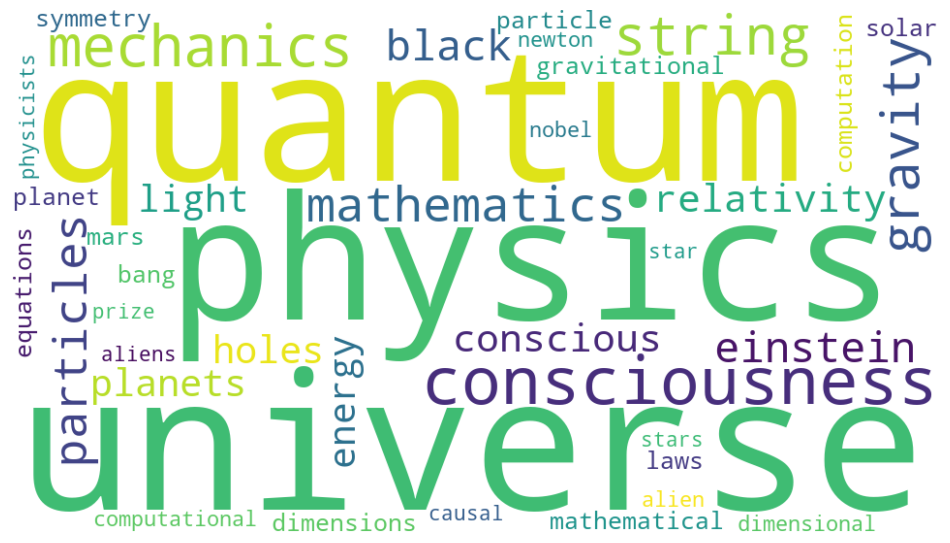

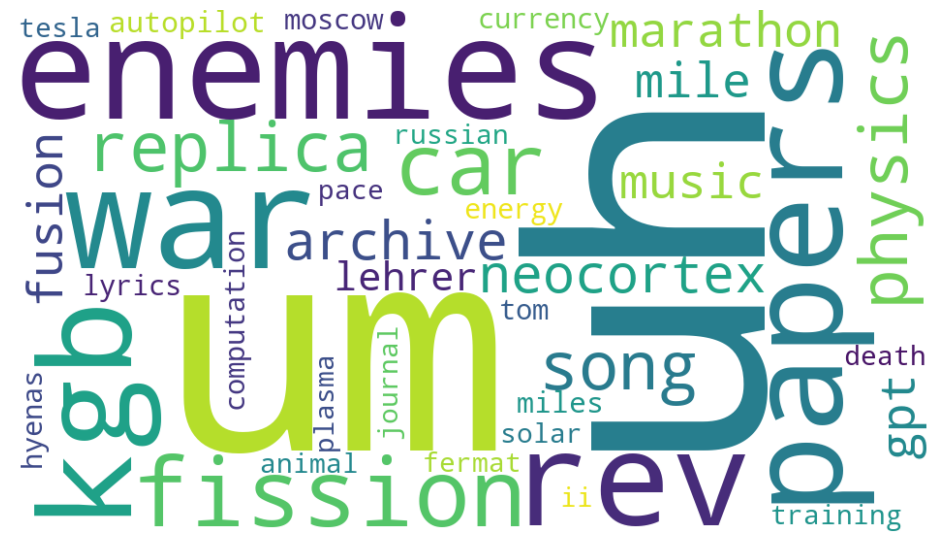

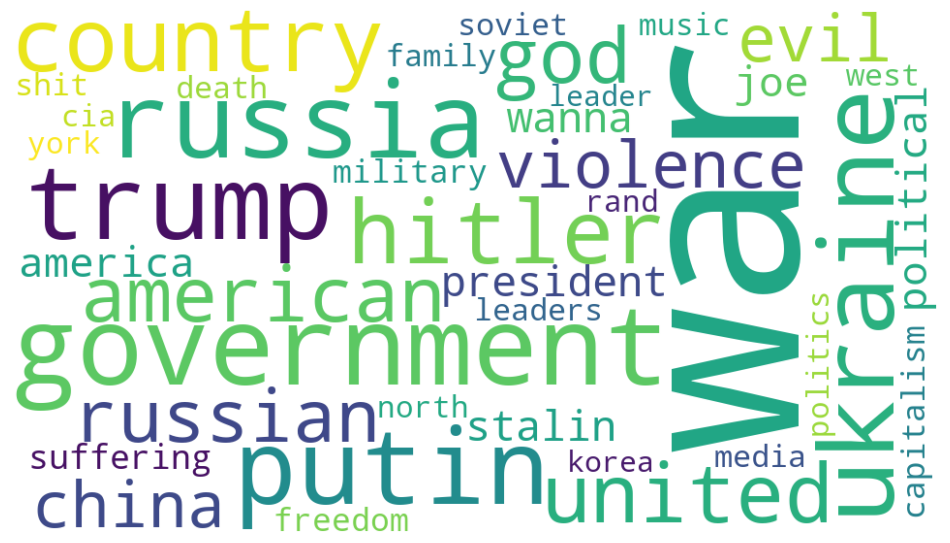

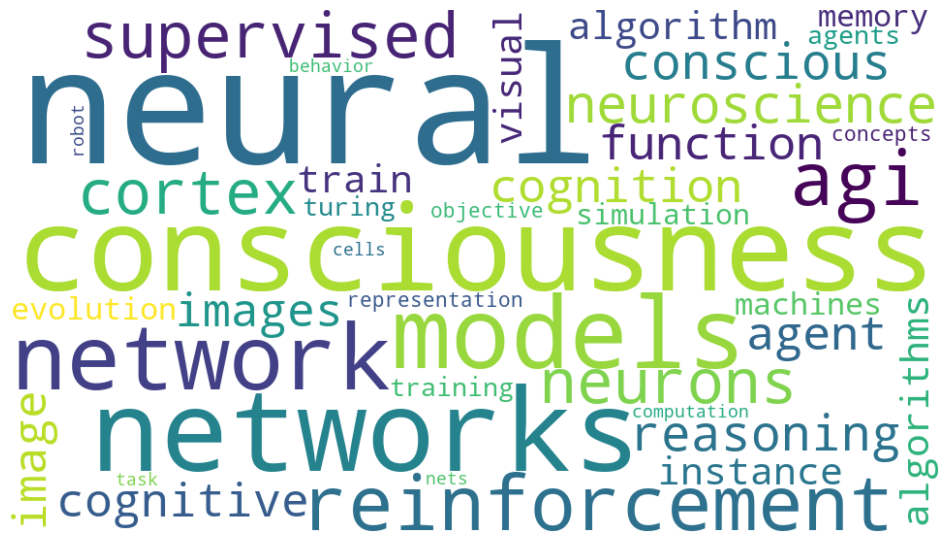

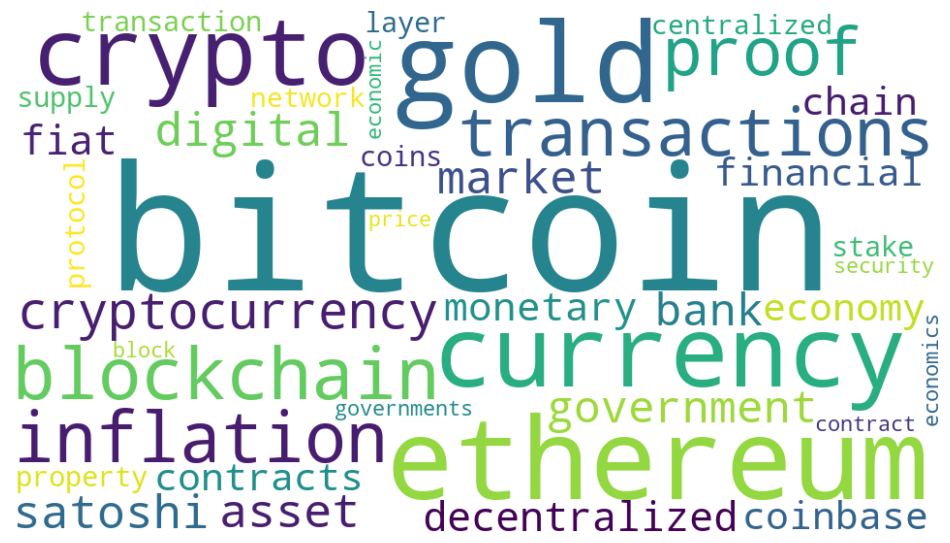

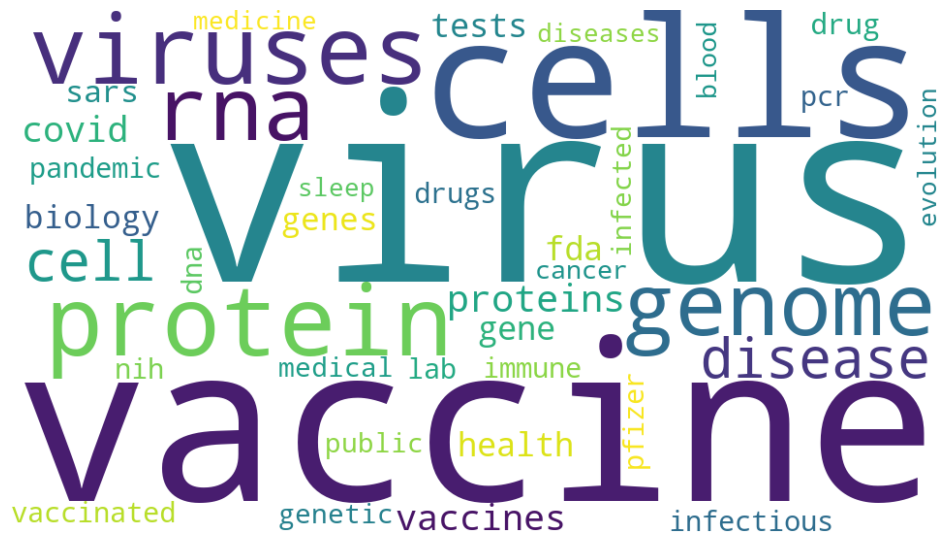

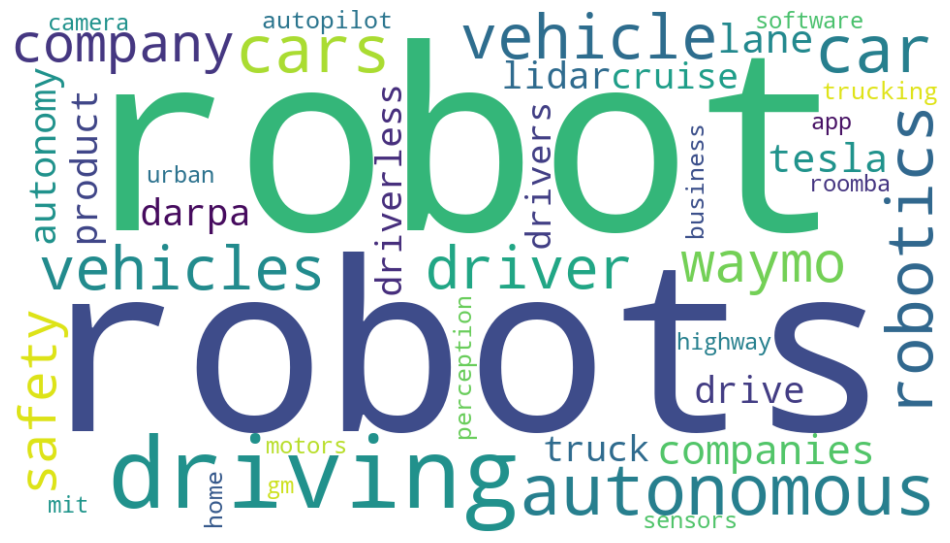

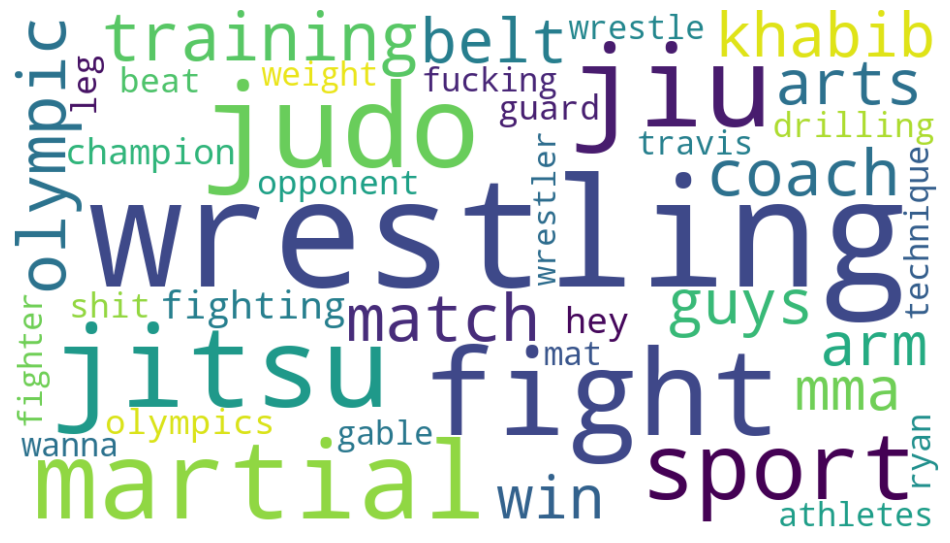

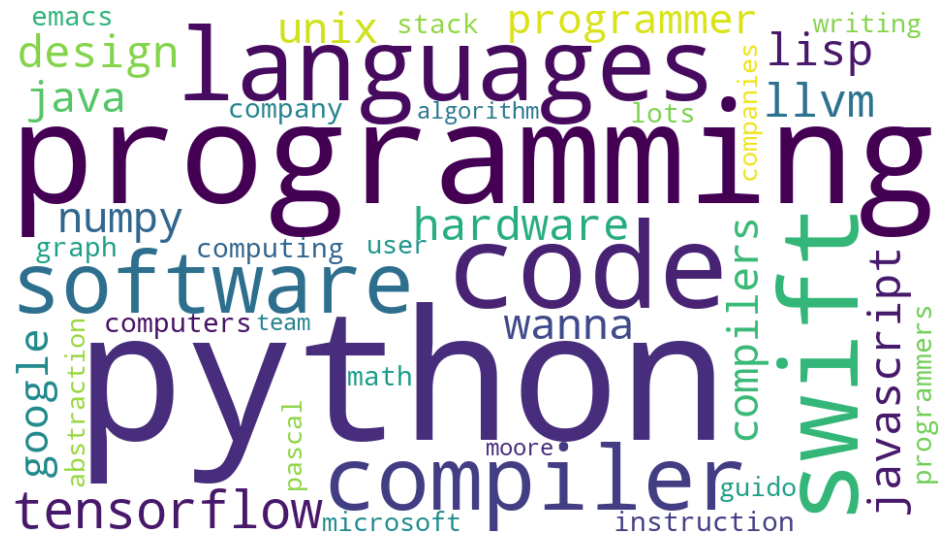

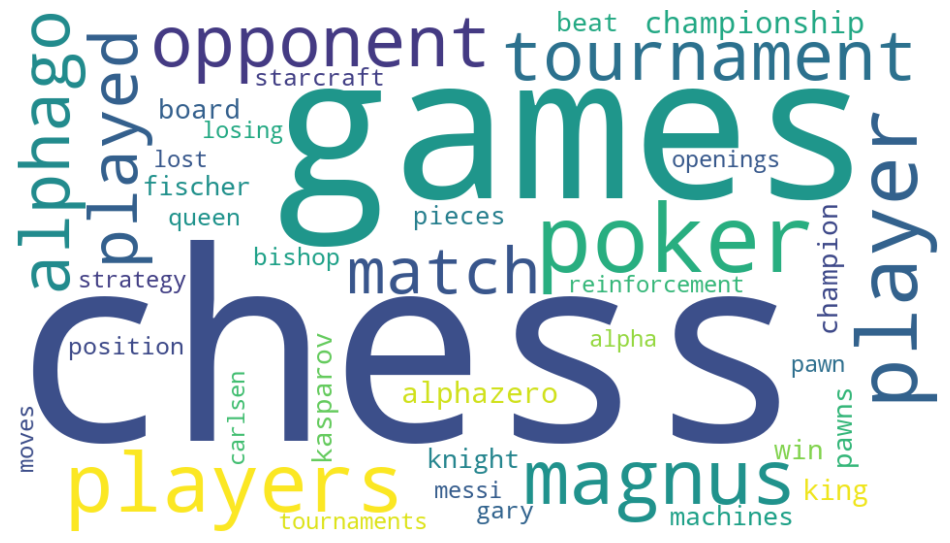

In [22]:
feature_names = tfidf_para_vectorizer.get_feature_names_out()
wordcloud_topics(nmf_para_model, feature_names)

#### generate and display a word cloud for each topic based on the top terms obtained from the lda model

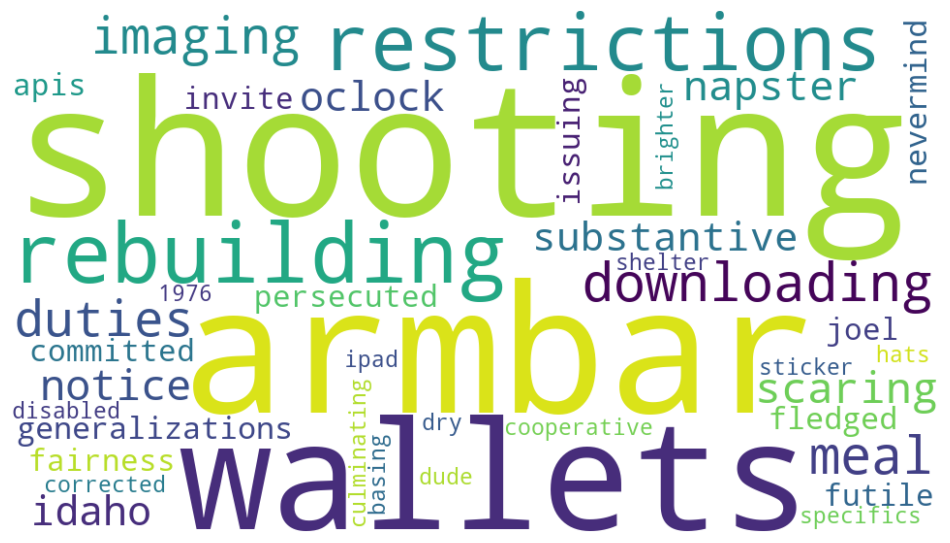

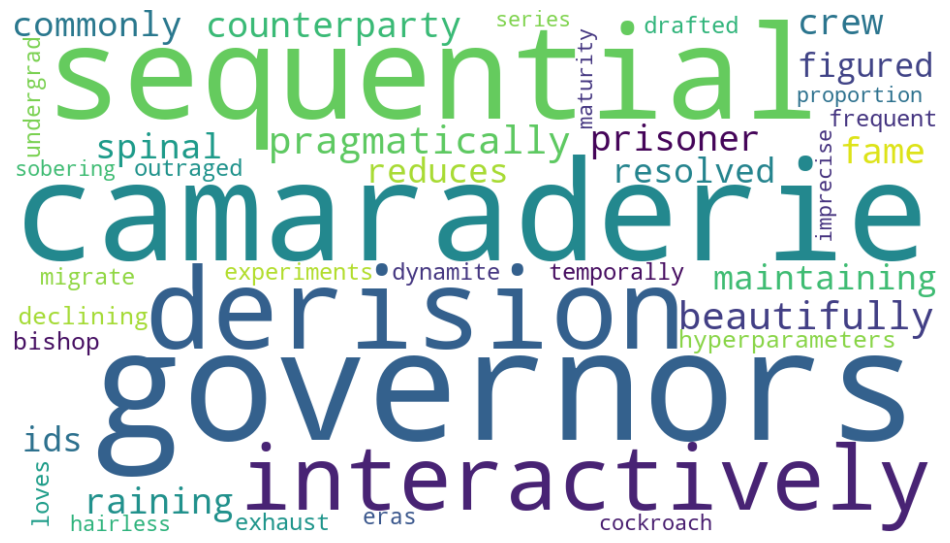

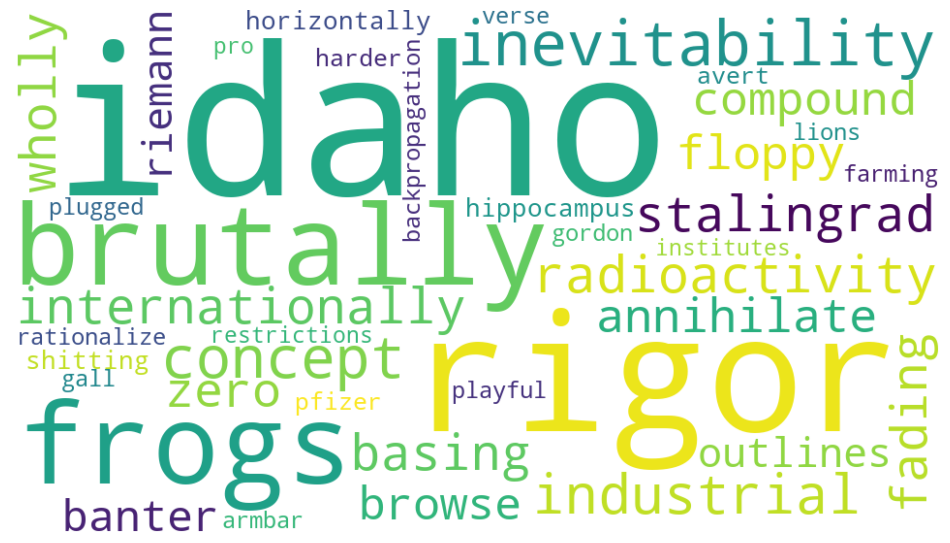

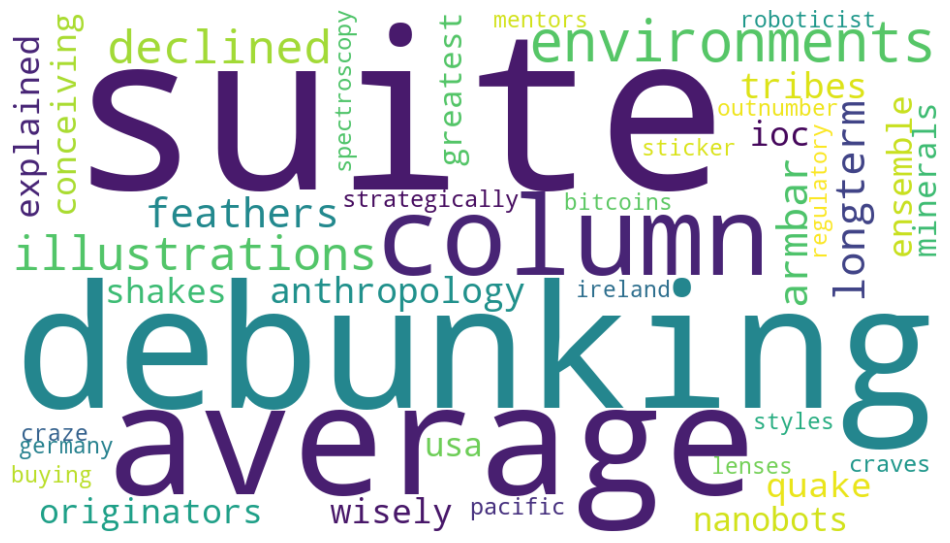

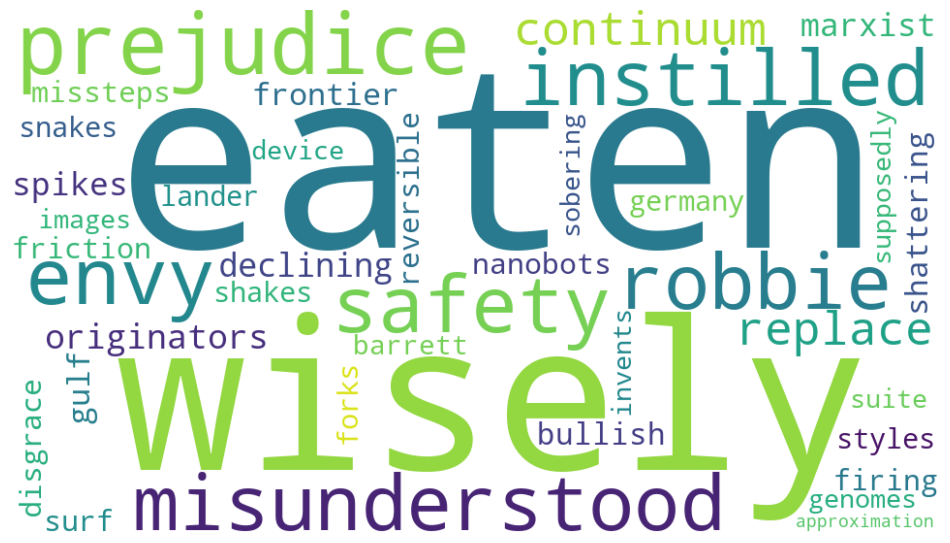

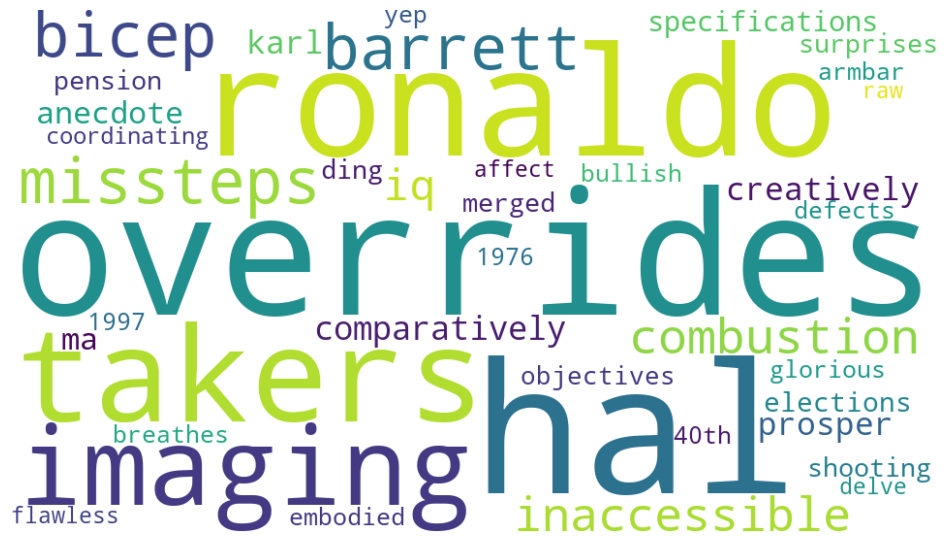

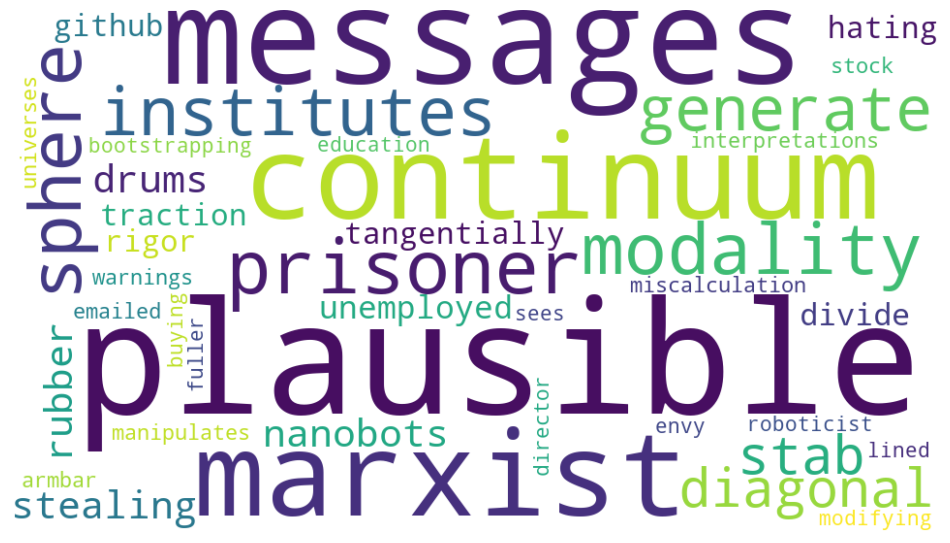

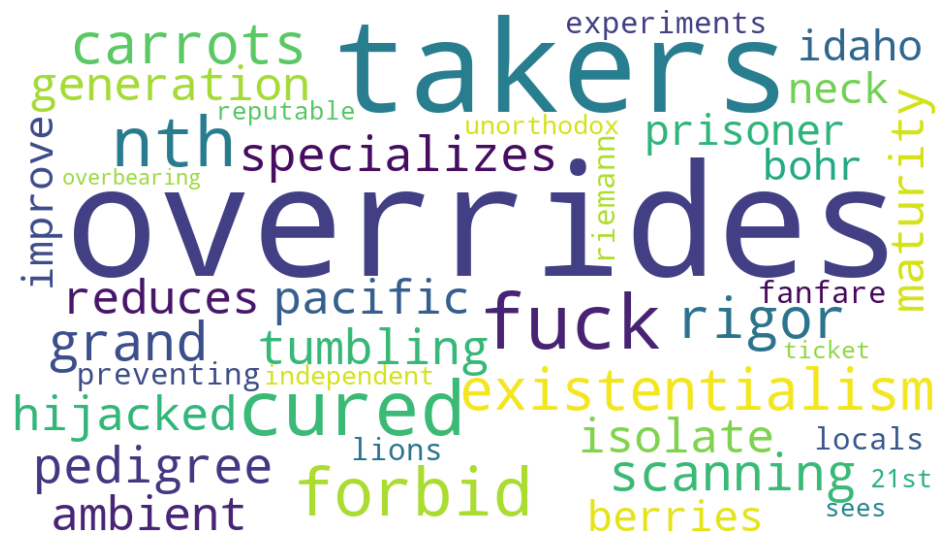

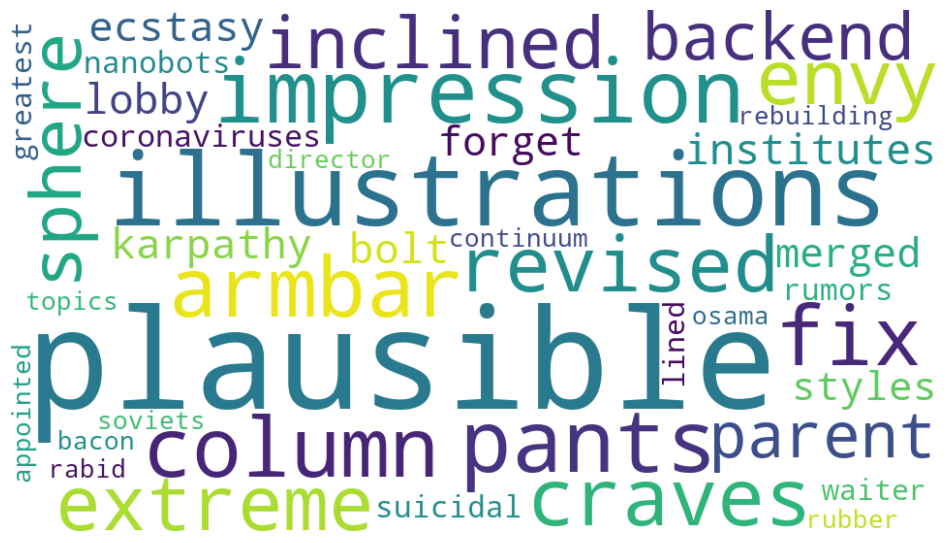

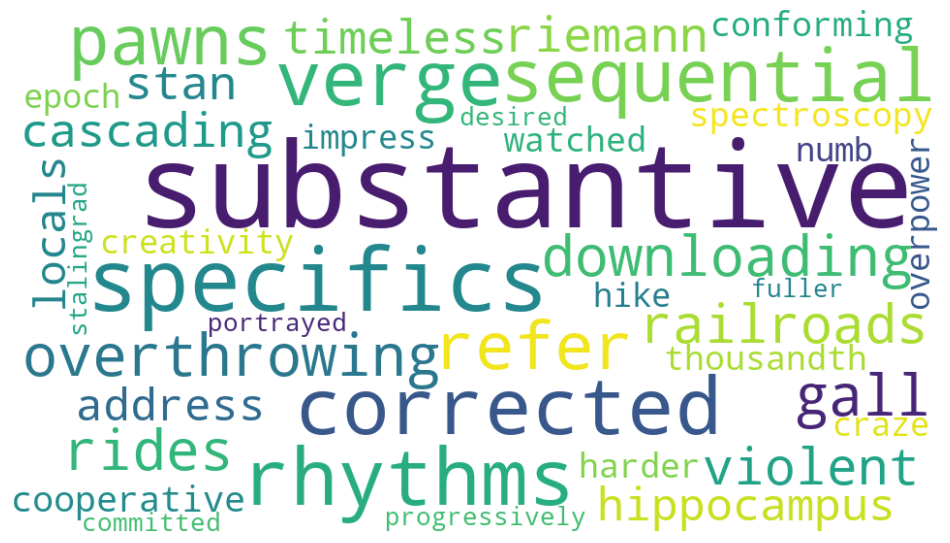

In [23]:
feature_names = list(count_para_vectorizer.vocabulary_.keys())
wordcloud_topics(lda_para_model, feature_names)

#### assign names to the topics generated by the Non-Negative Matrix Factorization (NMF) model

In [24]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)


#### populate guest_data with the percentage contribution of each topic across all paragraphs for each guest

In [25]:
from tqdm.auto import tqdm
import numpy as np
guest_data = []
for guest in tqdm(np.unique(np.unique(paragraph_df["guest"]))):
    W_guest = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["guest"] == guest)])
    guest_data.append([guest] + list(W_guest.sum(axis=0)/W_guest.sum()*100.0))

C:\Users\ruchitha\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\ruchitha\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\ruchitha\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\ruchitha\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been d

  0%|          | 0/281 [00:00<?, ?it/s]

#### plot the topic distribution for guests as an area plot, with each topic represented by a different colored area.

<Axes: xlabel='guest'>

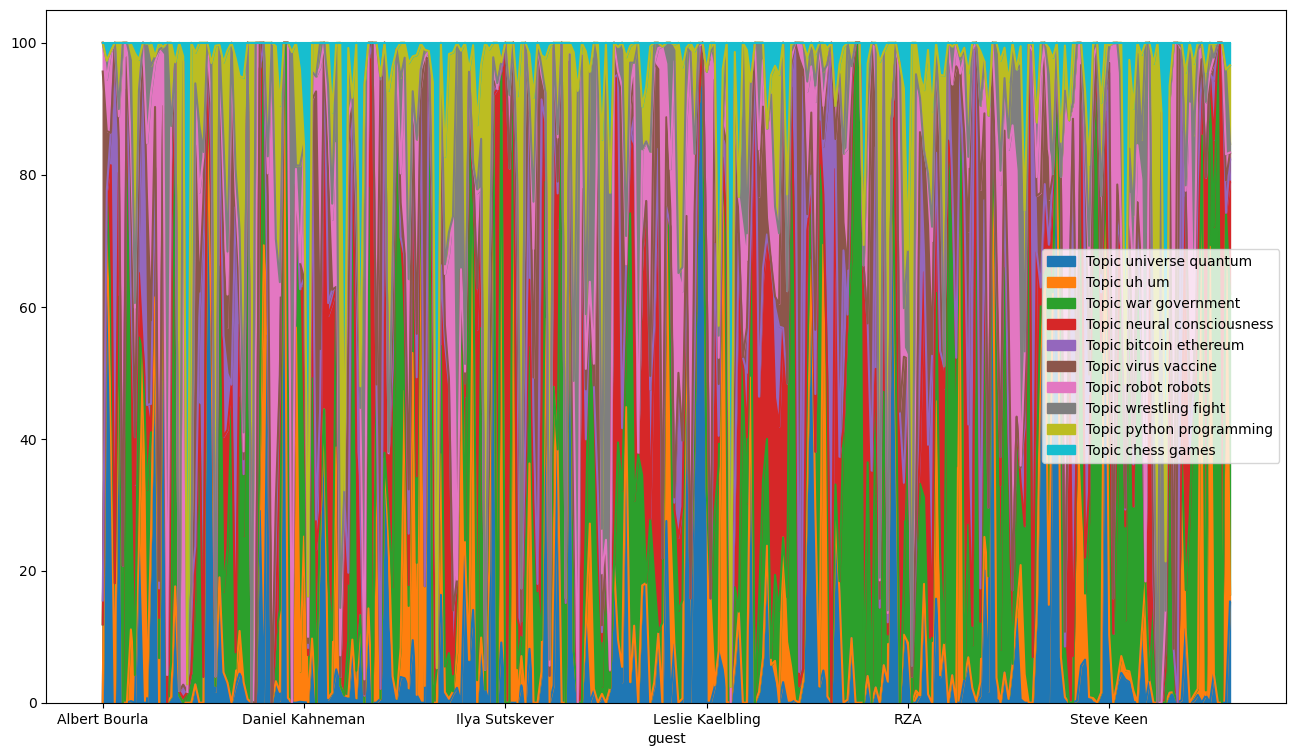

In [26]:
import matplotlib.pyplot as plt
df_guest = pd.DataFrame(guest_data, columns=["guest"] + topic_names).set_index("guest")
df_guest.plot.area(figsize=(16,9))